<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema_01/04_descenso_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 11: Introducción a las redes neuronales
# Tema 1: Neuronas artificiales
## Regresión lineal con descenso del gradiente

El objetivo de esta libreta es entrenar un modelo de regresión lineal usando el algoritmo de descenso del gradiente utilizando la norma L2 (como función de pérdida).


In [ ]:
#Carga de bibliotecas
import random
import numpy as np
import matplotlib.pyplot as plt

### Paso 1: Creación de datos aleatorios

Text(0, 0.5, 'y')

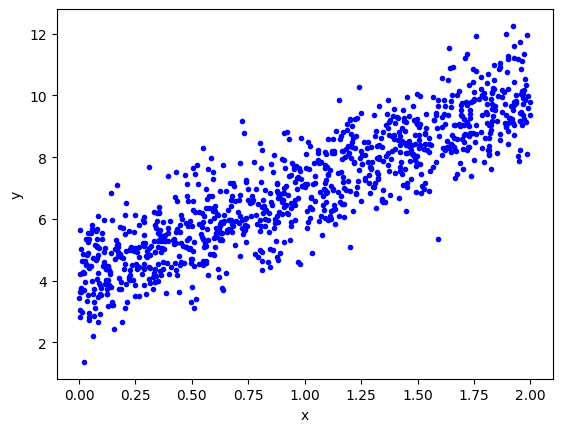

In [ ]:
X = 2 * np.random.rand(1000,1)
y = 4 + 3*X + np.random.randn(1000,1) #añadir ruido a los datos
n_observations = len(y)

plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")

### Paso 2: Construir algoritmo de optimización del descenso del gradiente

In [ ]:
def  cal_cost(w,X,y):
    "Función de costos"
    predictions = np.dot(X,w)
    cost = (1/(2*n_observations))*(predictions - y)
    return cost

def gradient_descent(X,y,w,learning_rate=0.01,iterations=100):
    "Algoritmo del descenso del gradiente"
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations,2))

    for it in range(iterations):
        #Calcular el costo del gradiente
        cost = cal_cost(w,X,y)
        grad_cost = X.T.dot(cost)

        #ajustar pesos
        w = w - learning_rate*(grad_cost)

        w_history[it,:] = w.T

        #Norma L2
        cost_history[it]  = abs(np.mean(cost))

    return w, cost_history, w_history

### Paso 3: calcular la regresión lineal usando el algoritmo de optimización del descenso del gradiente

In [ ]:
#Definición de hiper-parámetros
lr =0.1
n_iter = 1000

#Inicializando pesos aleatoriamente
w = np.random.randn(2,1)

print('Weight initialization')
print('w0:          {:0.3f},\nw1:          {:0.3f}'.format(w[0][0],w[1][0]))

#Cálculo del descenso del gradiente
X_b = np.c_[np.ones((len(X),1)),X]
w,cost_history,w_history = gradient_descent(X_b,y,w,lr,n_iter)

print('First cost/MSE:  {:0.15f}'.format(cost_history[0]))
print('w0:          {:0.3f},\nw1:          {:0.3f}'.format(w[0][0],w[1][0]))
print('Final cost/MSE:  {:0.15f}'.format(cost_history[-1]))

Weight initialization
w0:          0.270,
w1:          0.484
First cost/MSE:  0.003100928279044
w0:          4.011,
w1:          2.996
Final cost/MSE:  0.000000020209122


Text(0.5, 1.0, 'Pérdida durante el entrenamiento')

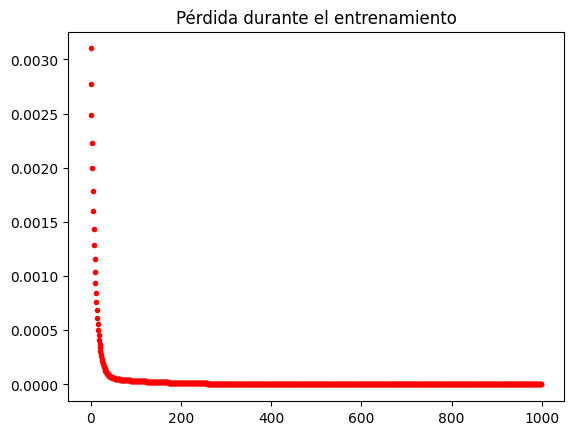

In [ ]:
plt.plot(cost_history, "r.")
plt.title("Pérdida durante el entrenamiento")

Text(0, 0.5, 'y')

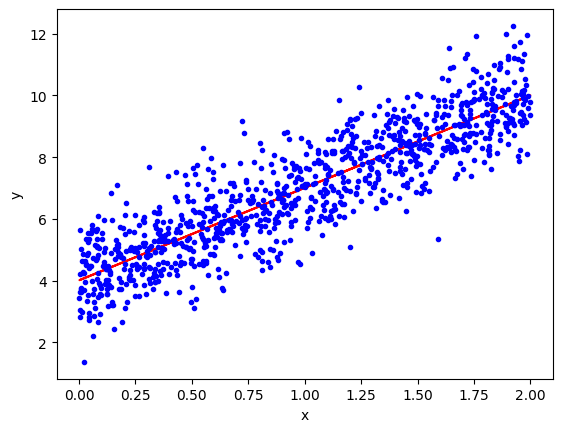

In [ ]:
y_predict = w[0][0] + w[1][0]*X

plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")